# NLP Classification

### Import libraries

In [2]:
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import HTML
import nltk
import pandas as pd
from PIL import Image
import numpy as np

import textblob
from textblob import TextBlob 

import random
import matplotlib.pyplot as plt 

In [3]:
pip install wordcloud

In [4]:
import pickle


with open('/content/drive/MyDrive/df_processed.pkl', 'rb') as f:
    df = pickle.load(f)

###Sentiment Analysis

In [5]:
# Create function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Create function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [6]:
# Apply all functions above to respective columns
df['Polarity']= df['Tweet_clean'].apply(getPolarity)
df['Sentiment']= df['Polarity'].apply(getSentimentTextBlob)

In [8]:
# Results of Sentiment Analysis
df['Sentiment'].value_counts()

Positive    42886
Negative     7113
Name: Sentiment, dtype: int64

In [9]:
df =df[['text_nonstop','Sentiment']]

In [10]:
df.head()

,text_nonstop,Sentiment
0,"[vixx, ken, anthony, bridgerton, liked, horror...",Positive
1,"[got, benedict, bridgerton, xd, httpstcoeccjzdfo]",Positive
2,"[scene, edwina, breaking, decision, viscount, ...",Negative
3,"[simone, told, run, bit, like, lady, boy, brid...",Positive
4,"[imagine, klaus, maddy, euphoria, bridgerton, ...",Positive


###Wordcloud

In [11]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/MyDrive/cloud.png"))
  
    wc = WordCloud(background_color="white",
                  mask = mask,max_words=300,repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


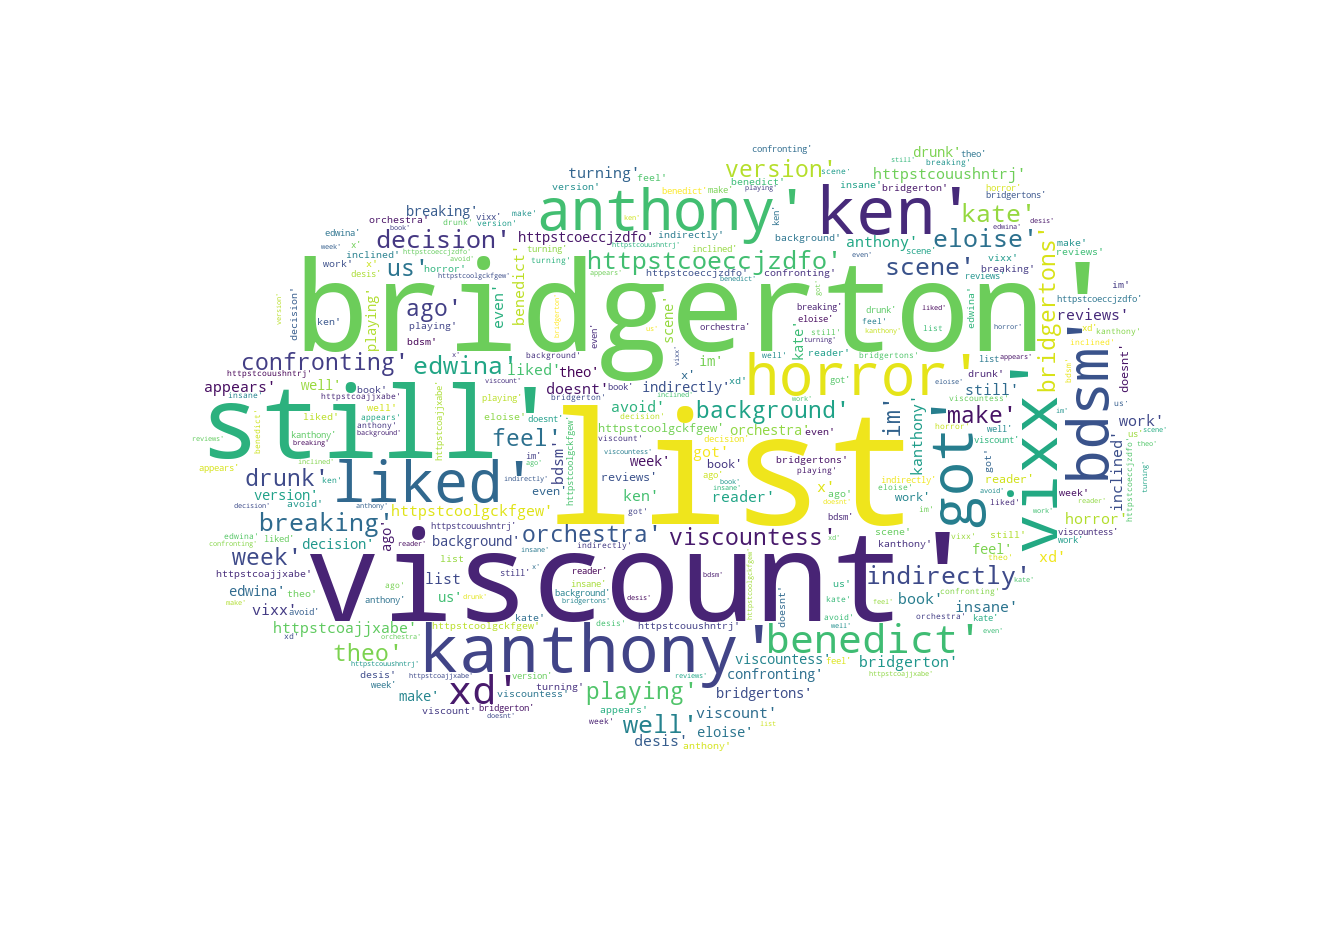

In [12]:
#Creating wordcloud for all reviews
create_wordcloud(df["text_nonstop"].values)

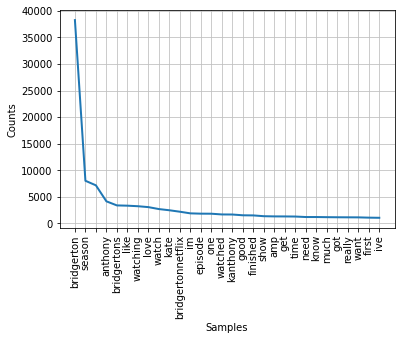

In [13]:
#words frequency for all tweets
from nltk.probability import FreqDist

words_split = []
for i in range(0,40355): 
    for word in df['text_nonstop'][i]:
        words_split.append(word)

FreqDist(words_split).plot(30, cumulative=False)

Wordcloud for negative tweets

In [14]:
df_negative = df[(df['Sentiment']== 'Negative')]
df_negative.count()

text_nonstop    7113
Sentiment       7113
dtype: int64

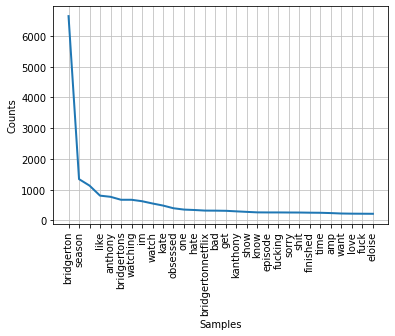

In [15]:
df_negative = df_negative.reset_index(drop=True)
words_split = []
for i in range(0,7113): 
    for word in df_negative['text_nonstop'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

Word Cloud Saved Successfully


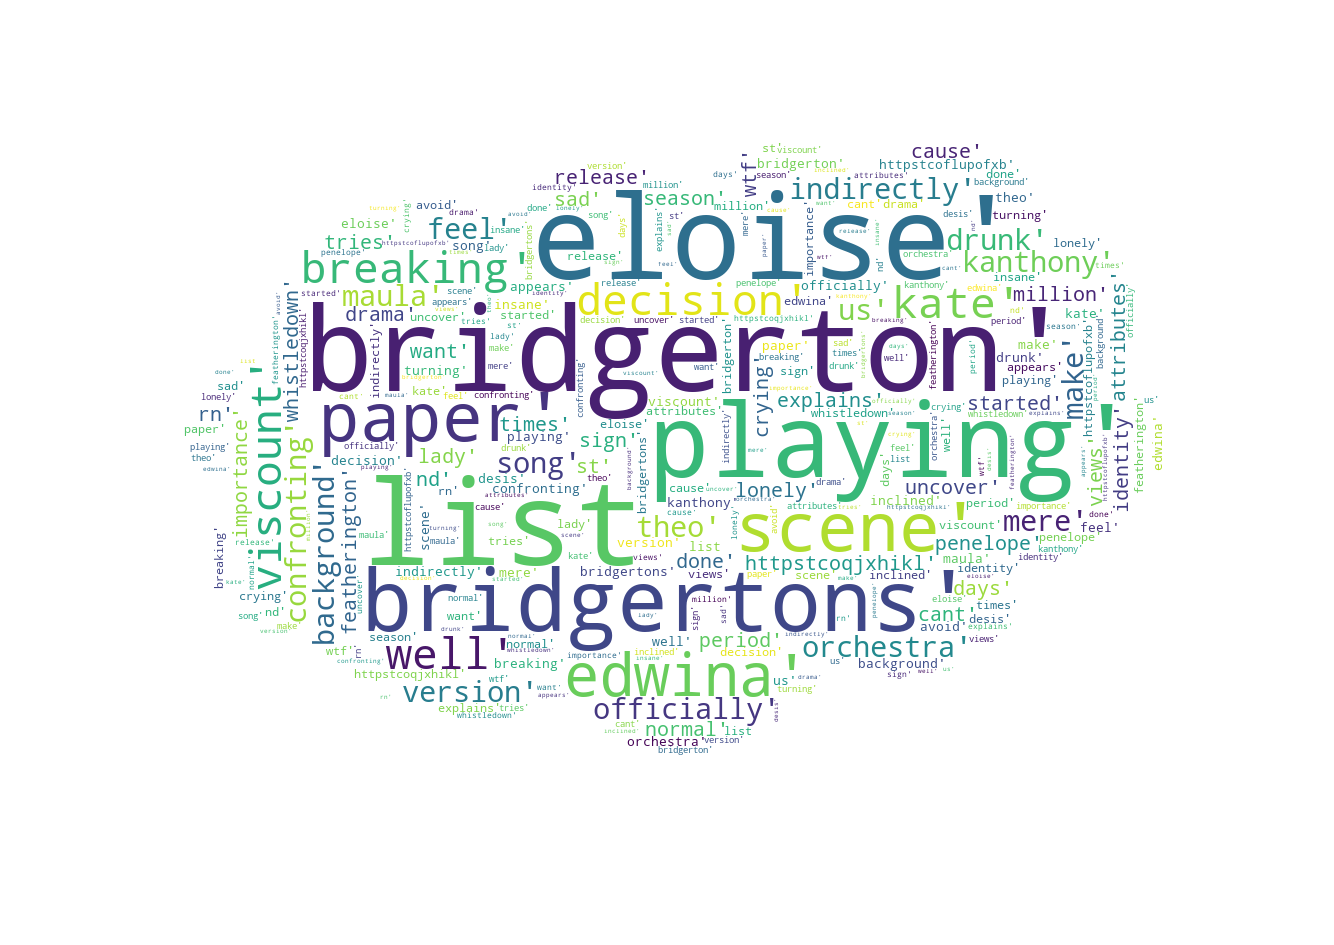

In [16]:
#Creating wordcloud for negative tweets
create_wordcloud(df_negative["text_nonstop"].values)

Wordcloud for positive tweets

In [17]:
df_positive = df[(df['Sentiment']=='Positive')]
df_positive.count()

text_nonstop    42886
Sentiment       42886
dtype: int64

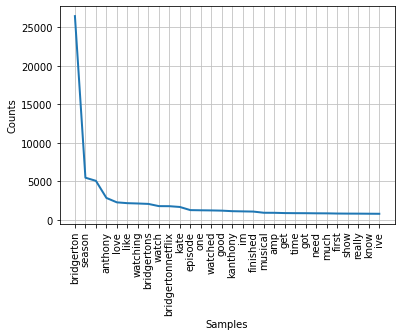

In [18]:
df_positive = df_positive.reset_index(drop=True)
words_split = []
for i in range(0,27880): 
    for word in df_positive['text_nonstop'][i]:
        words_split.append(word)
FreqDist(words_split).plot(30, cumulative=False)

Word Cloud Saved Successfully


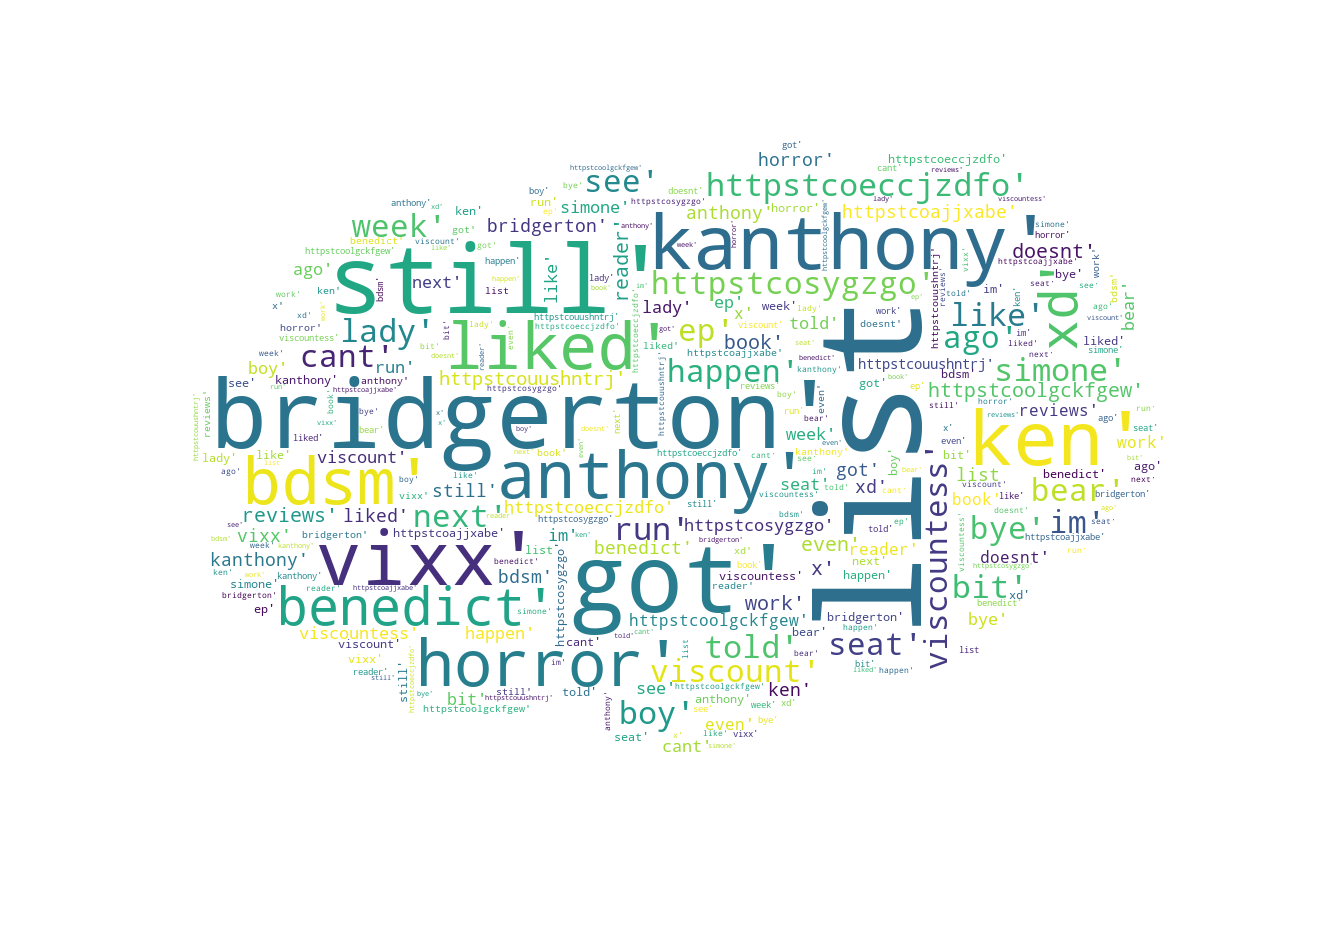

In [19]:
#Creating wordcloud for positive tweets
create_wordcloud(df_positive["text_nonstop"].values)

#NLP Supervised Learning

In [45]:
df.Sentiment.value_counts(normalize=True)

Positive    0.857737
Negative    0.142263
Name: Sentiment, dtype: float64

In [46]:
len(df)

49999

In [47]:
#I had to do it because my RAM is not enough 
df1= df.head(10000)

##Prepare Data For Modeling

In [48]:
# Split the data into X and y data sets
X = df1.text_nonstop.astype(str)
y = df1.Sentiment

In [49]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.shape

(8000,)

##CountVectorizer

In [51]:
# The first document-term matrix has default Count Vectorizer values - counts of unigrams
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaaaaaaaaaa,aaaaaahhhhhhhhhhh,aaaahhajznsnznx,aaaak,aaaall,...,𝘮𝘦,𝘮𝘺,𝘮𝘺𝘴𝘦𝘭𝘧,𝘰𝘧𝘧,𝘳𝘦𝘤𝘰𝘯𝘴𝘪𝘥𝘦𝘳,𝘵𝘩𝘪𝘴,𝘵𝘪𝘮𝘦,𝘵𝘰𝘭𝘥,𝘸𝘰𝘳𝘭𝘥,𝘺𝘰𝘶
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Ngram

In [52]:
# The second document-term matrix has both unigrams and bigrams
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaa bridgerton,aaa httpstcoadywovqxrt,aaaa,aaaa muero,aaaaa,aaaaa parece,aaaaaa,aaaaaaaaa,aaaaaaaaa moment,...,𝘵𝘩𝘪𝘴 𝘦𝘯𝘵𝘪𝘳𝘦,𝘵𝘪𝘮𝘦,𝘵𝘪𝘮𝘦 𝘚𝘱𝘪𝘯𝘯𝘪𝘯𝘨,𝘵𝘰𝘭𝘥,𝘵𝘰𝘭𝘥 𝘮𝘺𝘴𝘦𝘭𝘧,𝘸𝘰𝘳𝘭𝘥,𝘸𝘰𝘳𝘭𝘥 𝘰𝘧𝘧,𝘺𝘰𝘶,𝘺𝘰𝘶 𝘐𝘵,𝘺𝘰𝘶 𝘵𝘩𝘪𝘴
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [53]:
# Create a logistic regression model 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [54]:
# Train the first model
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [55]:
# Train the second model
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [56]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="plasma");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

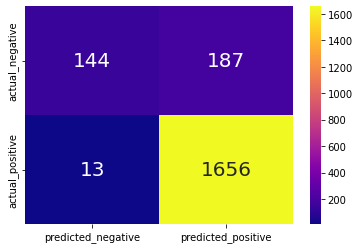

In [57]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred_cv1)

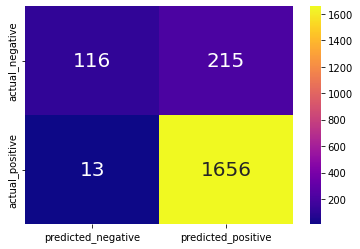

In [58]:
#The heat map for the second logistic regression model
cm2 = conf_matrix(y_test, y_pred_cv2)

In [59]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1']
results

,LogReg1
Accuracy,0.900
Precision,0.899
Recall,0.992
F1 Score,0.943


## Naive Bayes

In [60]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

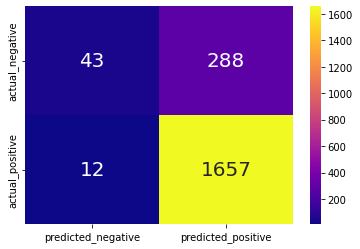

In [61]:
#heatmap for the Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

In [62]:
# Compile all of the error metrics into a dataframe for comparison
results_nb = pd.DataFrame(list(zip(cm2)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,NB
Accuracy,0.900,0.886
Precision,0.899,0.885
Recall,0.992,0.992
F1 Score,0.943,0.935


## KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
# Fit the KNN model
knn = KNeighborsClassifier(3)
knn.fit(X_train_cv1, y_train)

y_pred_cv1_knn = knn.predict(X_test_cv1)

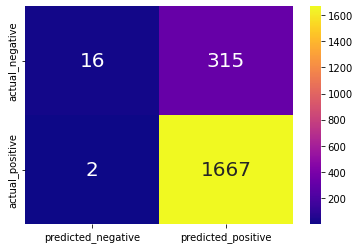

In [64]:
cm4 = conf_matrix(y_test, y_pred_cv1_knn)

In [65]:
# Compile all of the error metrics into a dataframe for comparison
results_knn = pd.DataFrame(list(zip(cm3)))
results_knn = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_knn.columns = ['KNN']
results_knn

results = pd.concat([results, results_knn], axis=1)
results

,LogReg1,NB,KNN
Accuracy,0.900,0.886,0.886
Precision,0.899,0.885,0.885
Recall,0.992,0.992,0.992
F1 Score,0.943,0.935,0.935


In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer

import datetime

pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 100)

In [67]:
#another way of running all the algorithms together
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log1 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_cv1, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    train_predictions = clf.predict(X_test_cv1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')

    
    log_entry = pd.DataFrame([[name, "CountVectorizer",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log1 = log1.append(log_entry)
#print("="*30)
round(log1,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,90.00,90.162,90.00,88.465
0,KNeighborsClassifier,CountVectorizer,84.15,84.898,84.15,77.722
0,DecisionTreeClassifier,CountVectorizer,91.35,91.170,91.35,91.247
0,RandomForestClassifier,CountVectorizer,91.40,91.010,91.40,91.099
0,AdaBoostClassifier,CountVectorizer,90.30,90.098,90.30,89.088
0,GradientBoostingClassifier,CountVectorizer,87.65,87.557,87.65,85.016
0,MultinomialNB,CountVectorizer,85.00,84.032,85.00,80.210
0,BernoulliNB,CountVectorizer,83.80,80.905,83.80,77.437


## TF-IDF

In [68]:
# Create TF-IDF versions of the Count Vectorizers 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

In [69]:
pd.DataFrame(X_train_tfidf1.toarray(), columns=tfidf1.get_feature_names()).head()

,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaaaaaaaaaa,aaaaaahhhhhhhhhhh,aaaahhajznsnznx,aaaak,aaaall,aaah,aah,...,𝘪𝘵𝘴,𝘮𝘢𝘬𝘪𝘯𝘨,𝘮𝘦,𝘮𝘺,𝘮𝘺𝘴𝘦𝘭𝘧,𝘰𝘧𝘧,𝘳𝘦𝘤𝘰𝘯𝘴𝘪𝘥𝘦𝘳,𝘵𝘩𝘪𝘴,𝘵𝘪𝘮𝘦,𝘵𝘰𝘭𝘥,𝘸𝘰𝘳𝘭𝘥,𝘺𝘰𝘶
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


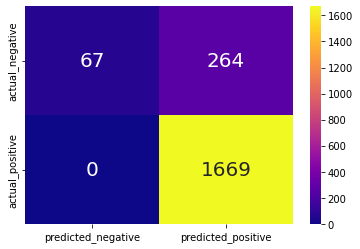

In [70]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm4 = conf_matrix(y_test, y_pred_tfidf1_lr)

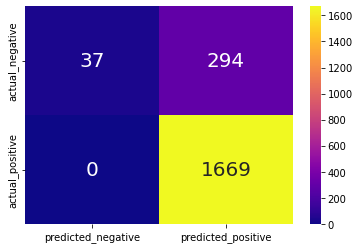

In [71]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm5 = conf_matrix(y_test, y_pred_tfidf2_lr)

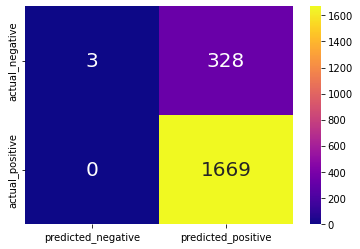

In [72]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)
cm6 = conf_matrix(y_test, y_pred_tfidf1_nb)

In [73]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm4,cm5, cm6)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF', 'NB1-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LogReg1,NB,KNN,LR1-TFIDF,LR2-TFIDF,NB1-TFIDF
Accuracy,0.900,0.886,0.886,0.868,0.853,0.836
Precision,0.899,0.885,0.885,0.863,0.850,0.836
Recall,0.992,0.992,0.992,1.000,1.000,1.000
F1 Score,0.943,0.935,0.935,0.926,0.919,0.911


In [74]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
    ]

log_cols=["Classifier","Methods", "Accuracy", "Precision","Recall","F1Score",]
log3 = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_tfidf1, y_train)
    name = clf.__class__.__name__
    
  
    
    train_predictions = clf.predict(X_test_tfidf1)
    accuracy = accuracy_score(y_test, train_predictions)
    f1 = f1_score(y_test, train_predictions,average='weighted')
    precision = precision_score(y_test, train_predictions,average='weighted')
    recall = recall_score(y_test, train_predictions,average='weighted')
   
    
    log_entry = pd.DataFrame([[name, "TF-IDF",accuracy*100, precision*100, recall*100,f1*100]], columns=log_cols)
    log3 = log3.append(log_entry)

round(log3,3)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,TF-IDF,86.80,88.603,86.80,82.906
0,KNeighborsClassifier,TF-IDF,86.60,85.230,86.60,84.116
0,DecisionTreeClassifier,TF-IDF,89.55,89.180,89.55,89.327
0,RandomForestClassifier,TF-IDF,90.65,90.191,90.65,89.805
0,AdaBoostClassifier,TF-IDF,89.30,88.586,89.30,88.149
0,GradientBoostingClassifier,TF-IDF,87.55,87.368,87.55,84.894
0,MultinomialNB,TF-IDF,83.60,86.294,83.60,76.281
0,BernoulliNB,TF-IDF,83.90,81.667,83.90,77.576


In [75]:
# Compile all of the error metrics into a dataframe for comparison

result = pd.concat([log1,log3],axis=0)
result

,Classifier,Methods,Accuracy,Precision,Recall,F1Score
0,LogisticRegression,CountVectorizer,90.00,90.162363,90.00,88.464935
0,KNeighborsClassifier,CountVectorizer,84.15,84.898371,84.15,77.721888
0,DecisionTreeClassifier,CountVectorizer,91.35,91.169573,91.35,91.246679
0,RandomForestClassifier,CountVectorizer,91.40,91.010064,91.40,91.099401
0,AdaBoostClassifier,CountVectorizer,90.30,90.097579,90.30,89.087674
0,GradientBoostingClassifier,CountVectorizer,87.65,87.557045,87.65,85.015747
0,MultinomialNB,CountVectorizer,85.00,84.032484,85.00,80.210078
0,BernoulliNB,CountVectorizer,83.80,80.904986,83.80,77.436799
0,LogisticRegression,TF-IDF,86.80,88.602794,86.80,82.905842
0,KNeighborsClassifier,TF-IDF,86.60,85.230248,86.60,84.116118


In [76]:
result["CM"]=result["Classifier"] +" "+ result["Methods"]
result.groupby("Classifier").mean()

,Accuracy,Precision,Recall,F1Score
Classifier,,,,
AdaBoostClassifier,89.800,89.341881,89.800,88.618195
BernoulliNB,83.850,81.285873,83.850,77.506439
DecisionTreeClassifier,90.450,90.174814,90.450,90.286852
GradientBoostingClassifier,87.600,87.462334,87.600,84.955082
KNeighborsClassifier,85.375,85.064310,85.375,80.919003
LogisticRegression,88.400,89.382578,88.400,85.685389
MultinomialNB,84.300,85.163062,84.300,78.245522
RandomForestClassifier,91.025,90.600580,91.025,90.452046


In [80]:
result.sort_values("Accuracy",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,RandomForestClassifier,CountVectorizer,91.40,91.010064,91.40,91.099401,RandomForestClassifier CountVectorizer
0,DecisionTreeClassifier,CountVectorizer,91.35,91.169573,91.35,91.246679,DecisionTreeClassifier CountVectorizer
0,RandomForestClassifier,TF-IDF,90.65,90.191097,90.65,89.804690,RandomForestClassifier TF-IDF
0,AdaBoostClassifier,CountVectorizer,90.30,90.097579,90.30,89.087674,AdaBoostClassifier CountVectorizer
0,LogisticRegression,CountVectorizer,90.00,90.162363,90.00,88.464935,LogisticRegression CountVectorizer


In [81]:
result.sort_values("Precision",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,DecisionTreeClassifier,CountVectorizer,91.35,91.169573,91.35,91.246679,DecisionTreeClassifier CountVectorizer
0,RandomForestClassifier,CountVectorizer,91.40,91.010064,91.40,91.099401,RandomForestClassifier CountVectorizer
0,RandomForestClassifier,TF-IDF,90.65,90.191097,90.65,89.804690,RandomForestClassifier TF-IDF
0,LogisticRegression,CountVectorizer,90.00,90.162363,90.00,88.464935,LogisticRegression CountVectorizer
0,AdaBoostClassifier,CountVectorizer,90.30,90.097579,90.30,89.087674,AdaBoostClassifier CountVectorizer


In [82]:
result.sort_values("Recall",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,RandomForestClassifier,CountVectorizer,91.40,91.010064,91.40,91.099401,RandomForestClassifier CountVectorizer
0,DecisionTreeClassifier,CountVectorizer,91.35,91.169573,91.35,91.246679,DecisionTreeClassifier CountVectorizer
0,RandomForestClassifier,TF-IDF,90.65,90.191097,90.65,89.804690,RandomForestClassifier TF-IDF
0,AdaBoostClassifier,CountVectorizer,90.30,90.097579,90.30,89.087674,AdaBoostClassifier CountVectorizer
0,LogisticRegression,CountVectorizer,90.00,90.162363,90.00,88.464935,LogisticRegression CountVectorizer


In [83]:
result.sort_values("F1Score",ascending=False).head(5)

,Classifier,Methods,Accuracy,Precision,Recall,F1Score,CM
0,DecisionTreeClassifier,CountVectorizer,91.35,91.169573,91.35,91.246679,DecisionTreeClassifier CountVectorizer
0,RandomForestClassifier,CountVectorizer,91.40,91.010064,91.40,91.099401,RandomForestClassifier CountVectorizer
0,RandomForestClassifier,TF-IDF,90.65,90.191097,90.65,89.804690,RandomForestClassifier TF-IDF
0,DecisionTreeClassifier,TF-IDF,89.55,89.180055,89.55,89.327024,DecisionTreeClassifier TF-IDF
0,AdaBoostClassifier,CountVectorizer,90.30,90.097579,90.30,89.087674,AdaBoostClassifier CountVectorizer


## Training the Final Model

In [85]:
dt = DecisionTreeClassifier()

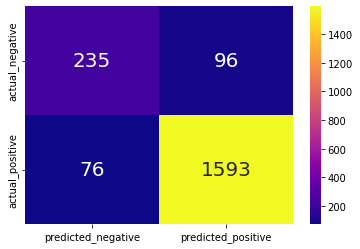

In [86]:
# Train the final model
dt.fit(X_train_cv1, y_train)
y_pred_cv1 = dt.predict(X_test_cv1)
cm = conf_matrix(y_test, y_pred_cv1)

In [87]:
# Print Sklearn Metrices
accuracy = accuracy_score(y_test, y_pred_cv1)
f1 = f1_score(y_test, y_pred_cv1,average='weighted')
precision = precision_score(y_test, y_pred_cv1,average='weighted')
recall = recall_score(y_test, y_pred_cv1,average='weighted')
print("Accuracy: {:.2%}".format(accuracy))
print("Precision: {:.2%}".format(precision))
print("Recall: {:.2%}".format(recall))
print("F1 Score: {:.2%}".format(f1))

Accuracy: 91.40%
Precision: 91.21%
Recall: 91.40%
F1 Score: 91.29%


In [88]:
df.to_csv("df_final.csv")

In [89]:
filename = 'final_model.pkl'
pickle.dump(lr, open(filename, 'wb'))